In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [6]:
dots = sns.load_dataset("dots")
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804


In [7]:
# dots veri seti, temel olarak nöronların görsel uyarana verdiği tepkiyi inceleyen bir deney verisi. Yani “neye tepki verdiler, hangi koşullarda nasıl değişti” gibi biyolojik/deneysel bir veri.


In [ ]:
# Sütun isimleri ve anlamları
# align	Stimulus hizalaması / türü (örneğin bir nesnenin yönü)
# choice	Katılımcı veya nöronun verdiği tepki / seçimi
# coherence	Stimulus uyum oranı (0–1 arası)
# time	Ölçüm zamanı (ms veya deney birimi)
# firing_rate	Nöronların ateşleme hızı (hertz)

In [4]:
dots.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [15]:
dots.tail()

,align,choice,time,coherence,firing_rate
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804
847,sacc,T2,300,51.2,30.959302


In [91]:
dots.sample(3)

,align,choice,time,coherence,firing_rate
835,sacc,T2,260,51.2,31.104651
768,sacc,T2,40,25.6,28.333333
566,sacc,T1,140,6.4,24.388753


In [92]:
dots.size

4240

In [8]:
dots.shape

(848, 5)

In [93]:
dots.columns

Index(['align', 'choice', 'time', 'coherence', 'firing_rate'], dtype='object')

In [94]:
dots.index

RangeIndex(start=0, stop=848, step=1)

In [12]:
dots.info()
# boş değer yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   align        848 non-null    object 
 1   choice       848 non-null    object 
 2   time         848 non-null    int64  
 3   coherence    848 non-null    float64
 4   firing_rate  848 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 33.3+ KB


In [95]:
dots.describe().T # istatistiksel veriler 

,count,mean,std,min,25%,50%,75%,max
time,848.0,74.150943,284.596669,-600.00000,-100.000000,80.000000,260.000000,720.0000
coherence,848.0,12.898113,15.453506,0.00000,3.200000,6.400000,12.800000,51.2000
firing_rate,848.0,39.616662,12.232967,6.27572,32.620191,38.022005,47.383649,70.0489


In [96]:
dots.mean(numeric_only = True)

time           74.150943
coherence      12.898113
firing_rate    39.616662
dtype: float64

In [97]:
dots.std(numeric_only = True)

time           284.596669
coherence       15.453506
firing_rate     12.232967
dtype: float64

In [98]:
dots.median(numeric_only = True)

time           80.000000
coherence       6.400000
firing_rate    38.022005
dtype: float64

In [110]:
dots["choice"].unique() # choice sütunu unique degerleri

array(['T1', 'T2'], dtype=object)

In [113]:
dots.choice.value_counts() # unique değerlerin sayisi

choice
T2    430
T1    418
Name: count, dtype: int64

In [111]:
dots["align"].unique() # align sütunu unique degerleri

array(['dots', 'sacc'], dtype=object)

In [112]:
dots["align"].value_counts() # unique değerlerin sayisi

align
sacc    454
dots    394
Name: count, dtype: int64

In [117]:
dots.firing_rate.sort_values(ascending = False).head(20) # firing_rate sutunun en yüksek değerlerinin sıralaması.

524    70.048900
519    69.833598
526    69.569472
520    69.275930
521    69.252551
516    68.376494
518    68.276284
525    68.166887
527    67.871094
512    67.787286
522    67.679283
513    67.649449
514    67.480670
530    66.992665
517    66.819560
515    66.612793
511    66.463225
533    66.455078
523    66.443452
532    66.242661
Name: firing_rate, dtype: float64

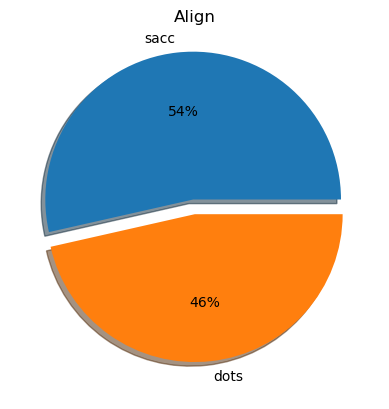

In [131]:
explode = [0.1, 0]
plt.pie(dots["align"].value_counts(), labels = dots["align"].value_counts().index, autopct = "%1.0f%%", shadow = True, explode = explode )
plt.title("Align")
plt.show()

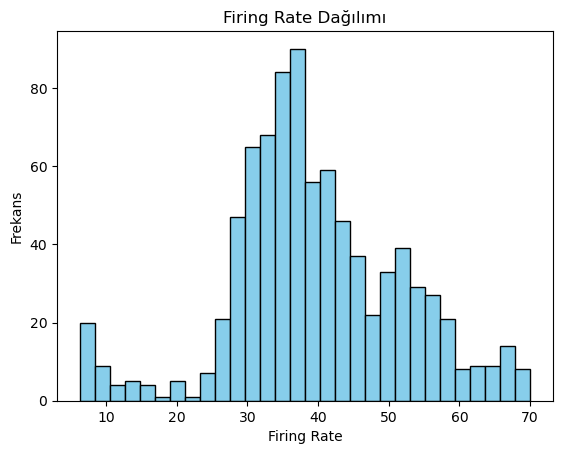

In [145]:
dots = sns.load_dataset("dots")

plt.hist(dots["firing_rate"], bins=30, color="skyblue", edgecolor="black")
plt.title("Firing Rate Dağılımı")
plt.xlabel("Firing Rate")
plt.ylabel("Frekans")
plt.show()
# firing_rate dağılımı histplot

In [51]:
# Her align kategorisi için ortalama firing_rate hesaplama
mean_rates = dots.groupby("align")["firing_rate"].mean()
mean_rates

align
dots    40.231249
sacc    39.083297
Name: firing_rate, dtype: float64

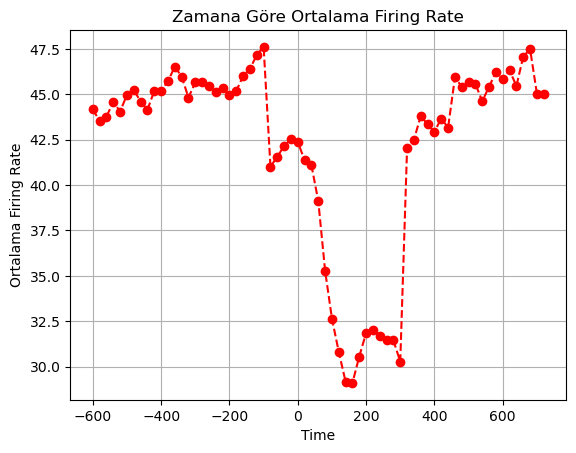

In [151]:
mean_by_time = dots.groupby("time")["firing_rate"].mean()

plt.plot(mean_by_time.index, mean_by_time.values, "o--r")
plt.title("Zamana Göre Ortalama Firing Rate")
plt.xlabel("Time")
plt.ylabel("Ortalama Firing Rate")
plt.grid(True)
plt.show()
# matplotlib ile

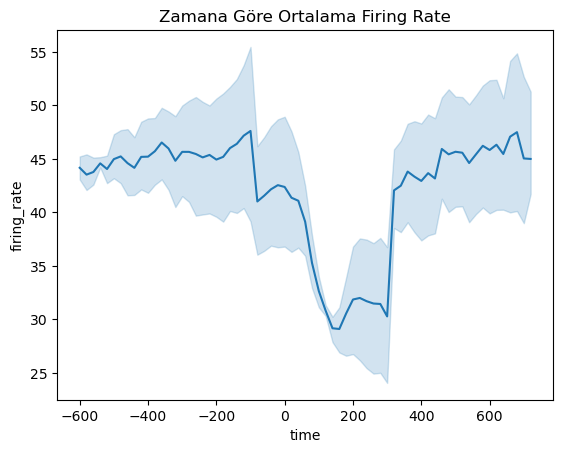

In [48]:
# time'a göre ortalama firing_rate
sns.lineplot(data = dots, x = "time", y = "firing_rate", estimator = "mean")

plt.title("Zamana Göre Ortalama Firing Rate")
plt.show()

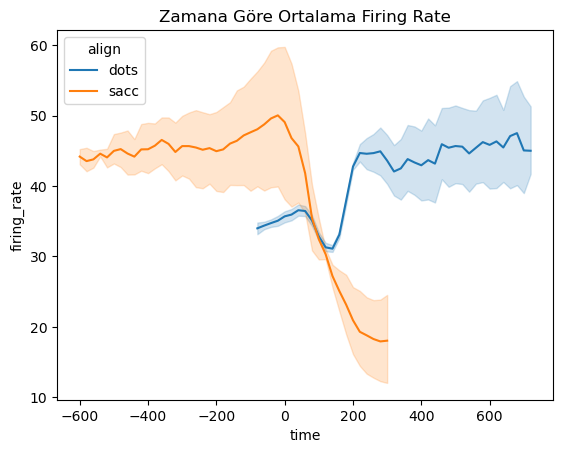

In [50]:
sns.lineplot(data = dots, x = "time", y = "firing_rate", estimator = "mean", hue = "align")

plt.title("Zamana Göre Ortalama Firing Rate")
plt.show()

# Zaman arttıkça firing rate de değişimler gözlenir

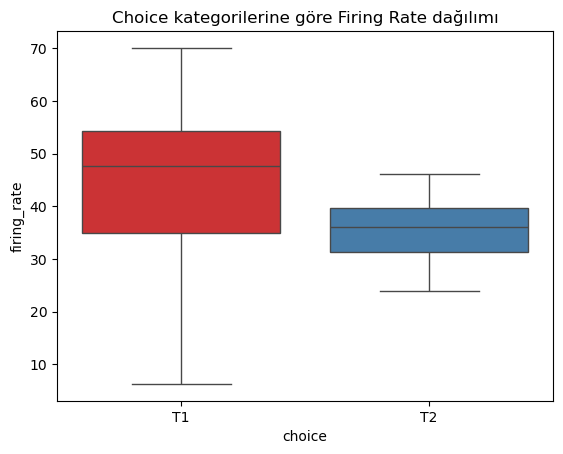

In [59]:
sns.boxplot(data = dots, x = "choice", y = "firing_rate", palette = "Set1")
plt.title("Choice kategorilerine göre Firing Rate dağılımı")
plt.show()
# choice kategorilerine göre firing_rate dağılımını boxplot ile gösterimi.

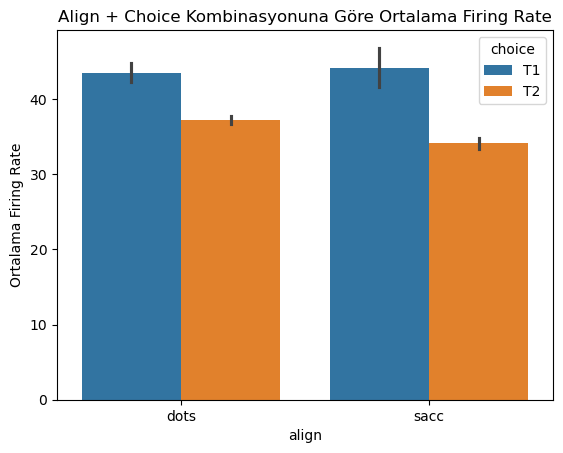

In [65]:
sns.barplot(data = dots, x = "align", y = "firing_rate", hue = "choice", estimator = "mean")
# estimator = "mean" -> ortalama değer alınır.
plt.title("Align + Choice Kombinasyonuna Göre Ortalama Firing Rate")
plt.ylabel("Ortalama Firing Rate")
plt.show()
# align + choice kombinasyonuna göre ortalama firing_rate’i barplot ile görselleştirilmesi.

In [78]:
# coherence ile firing_rate arasındaki korelasyon
corr = dots["coherence"].corr(dots["firing_rate"])
corr

np.float64(-0.1272794416158841)

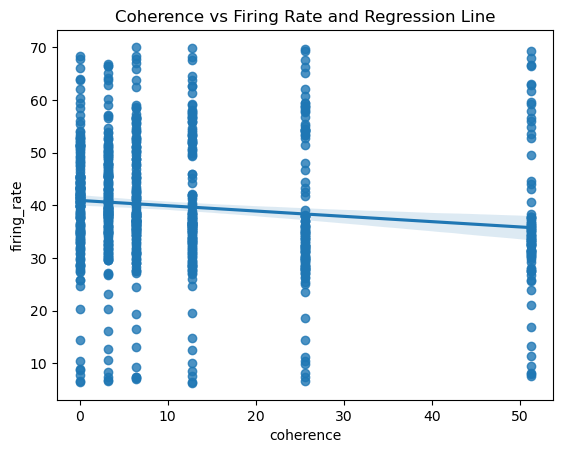

In [135]:
# coherence ile firing_rate arasındaki korelasyon dağılımı ve trendline
sns.regplot(data = dots, x = "coherence", y = "firing_rate")
plt.title("Coherence vs Firing Rate and Regression Line")
plt.show()

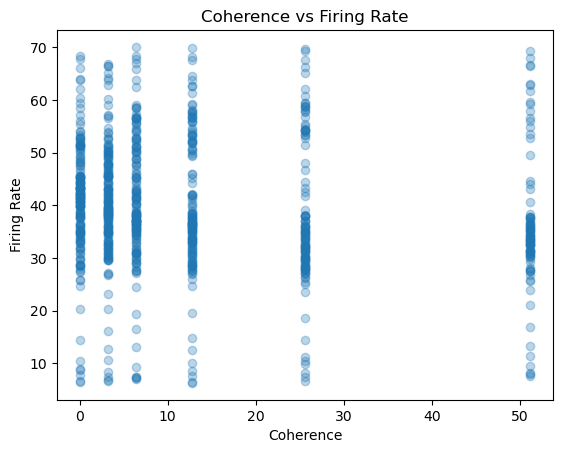

In [147]:
plt.scatter(dots["coherence"], dots["firing_rate"], alpha=0.3)
plt.title("Coherence vs Firing Rate")
plt.xlabel("Coherence")
plt.ylabel("Firing Rate")
plt.show()
# Matplotlib ile 

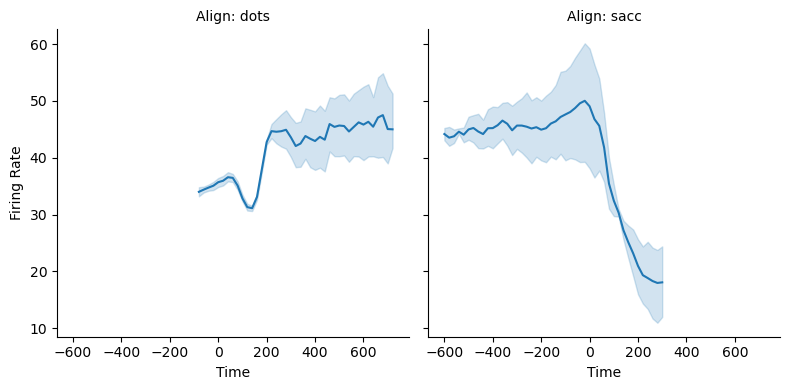

In [89]:
g = sns.FacetGrid(dots, col = "align", height = 4)
g.map(sns.lineplot, "time", "firing_rate", estimator="mean")

g.set_axis_labels("Time", "Firing Rate")
g.set_titles("Align: {col_name}")
plt.show()
# her align kategorisi için time vs firing_rate

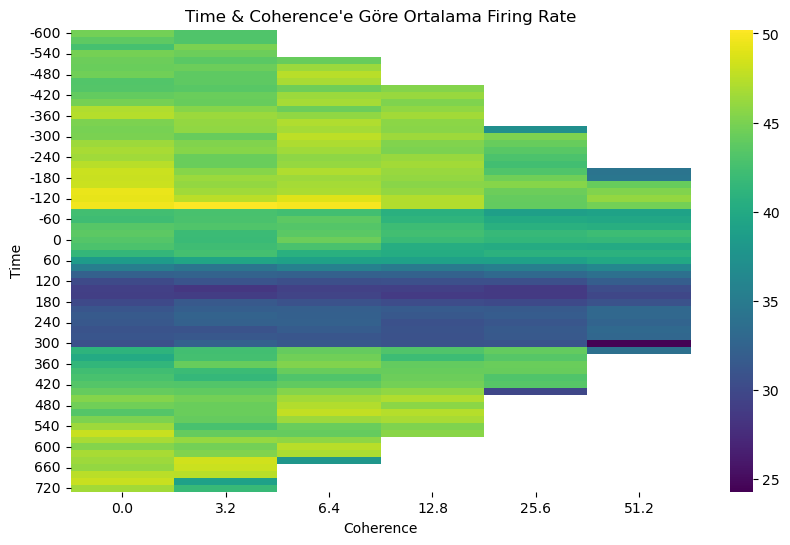

In [90]:
pivot_table = dots.pivot_table(
    index="time",
    columns="coherence",
    values="firing_rate",
    aggfunc="mean"
)

# heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap="viridis")
plt.title("Time & Coherence'e Göre Ortalama Firing Rate")
plt.xlabel("Coherence")
plt.ylabel("Time")
plt.show()
# Açıklama:

# pivot_table → her time–coherence kombinasyonu için ortalama firing_rate hesaplar.

# heatmap → renkler aracılığıyla ateşleme hızını görselleştirir.

# bu bölümde gpt kullandım.